<a href="https://colab.research.google.com/github/DJCordhose/ml-resources/blob/main/notebooks/priors/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

Shall we assume 
1. a linear relationship?
1. values are a sequence, i.e. the next value depends on what we had before

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

figsize_3d = (20, 10)

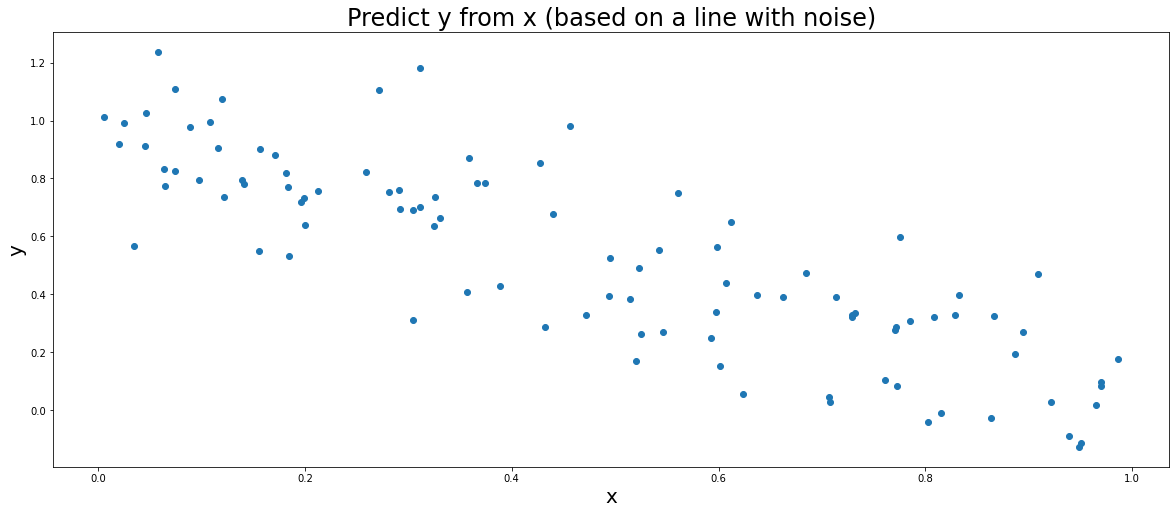

In [3]:
#@title A noisy line of shape y = m*x + b { run: "auto", display-mode: "form" }

# https://colab.research.google.com/notebooks/forms.ipynb

n = 100 #@param {type:"slider", min:10, max:500, step:1}
m = -1 #@param {type:"slider", min:-10, max:10, step: 0.1}
b = 1 #@param {type:"slider", min:-10, max:10, step: 0.1}

noise_level = 0.2 #@param {type:"slider", min:0.0, max:1.0, step:0.1}

title = 'Predict y from x (based on a line with noise)' #@param {type:"string"}
x_label = 'x' #@param {type:"string"}
y_label = 'y' #@param {type:"string"}

import numpy as np
np.random.seed(42)

# sort is not necessary, but makes x easier to understand
x = np.sort(np.random.uniform(0, 1, n))
y = m*x+b + np.random.normal(0, noise_level, n)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.scatter(x, y);

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

'2.8.0'

In [5]:
# https://keras.io/metrics/#custom-metrics
# https://www.tensorflow.org/tutorials/customization/performance
  
# ported to TF 2 from 
# * https://stackoverflow.com/a/42351397/1756489 and
# * https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/34019 (for use of epsilon to avoid strange inf or -inf)

# only works properly on tensors

@tf.function
def r2_metric(y_true, y_pred):
  total_error = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
  R_squared = tf.subtract(1.0, tf.divide(unexplained_error, tf.add(total_error, tf.keras.backend.epsilon())))
  
  return R_squared

In [6]:
from tensorflow.keras.layers import Dense, Input
 
model = tf.keras.Sequential([
  Input(shape=1),
#   Dense(units=500, activation='relu'),                   
#   Dense(units=500, activation='relu'),                   
#   Dense(units=500, activation='relu'),                   
  Dense(units=1)                   
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
%%time 

model.compile(loss='mse',
             optimizer='adam',
             metrics=[r2_metric])

history = model.fit(x, y, epochs=1000, verbose=0)

CPU times: user 13 s, sys: 986 ms, total: 14 s
Wall time: 16.5 s


In [8]:
loss, r2 = model.evaluate(x, y, verbose=0)
loss, r2

(0.032788604497909546, -0.015442222356796265)

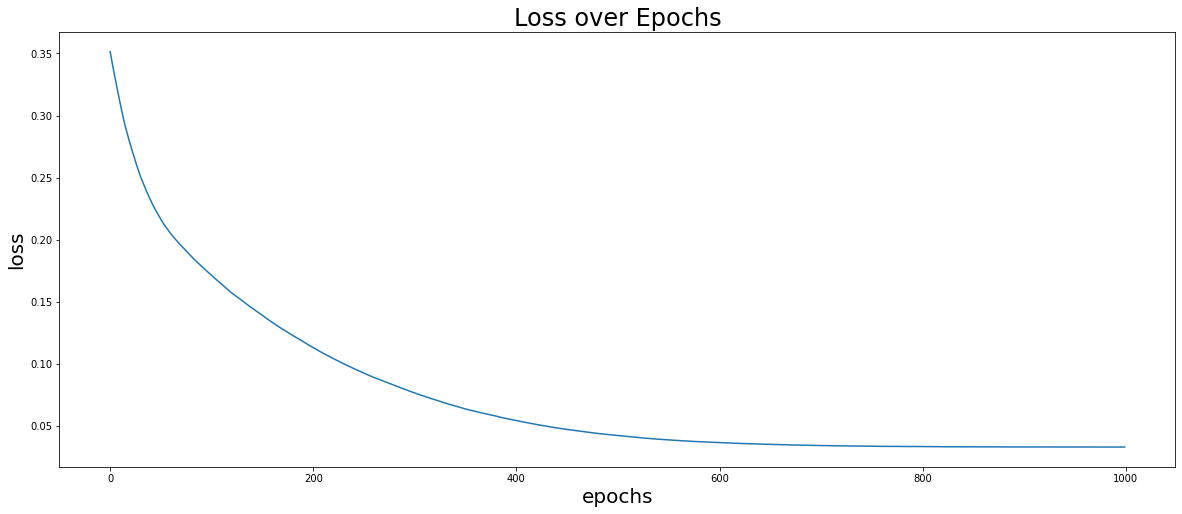

In [9]:
# plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title('Loss over Epochs')

plt.plot(history.history['loss']);

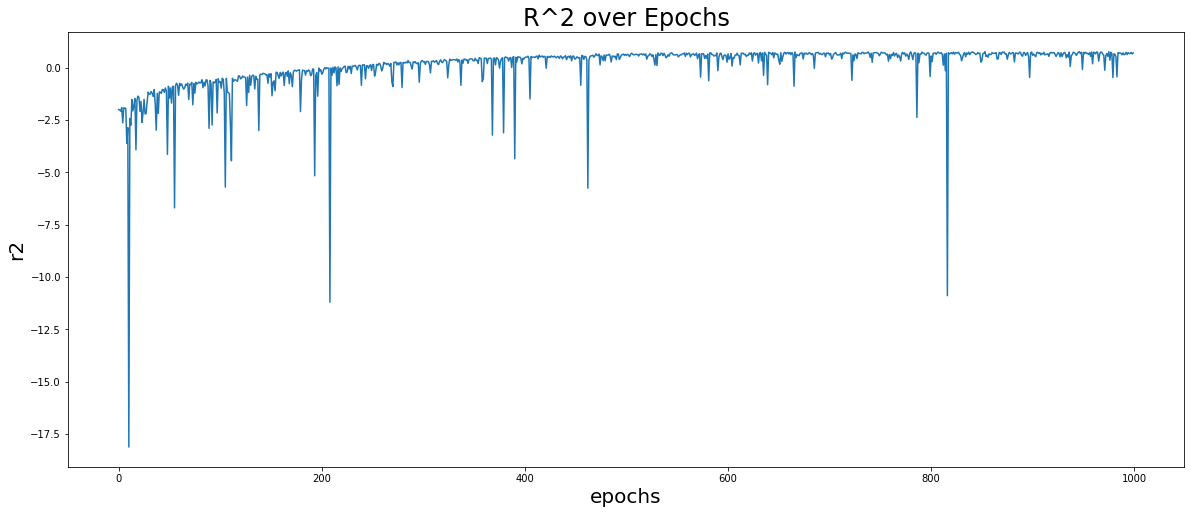

In [10]:
plt.ylabel("r2")
plt.xlabel("epochs")
plt.title('R^2 over Epochs')
# plt.yscale('log')

plt.plot(history.history['r2_metric']);

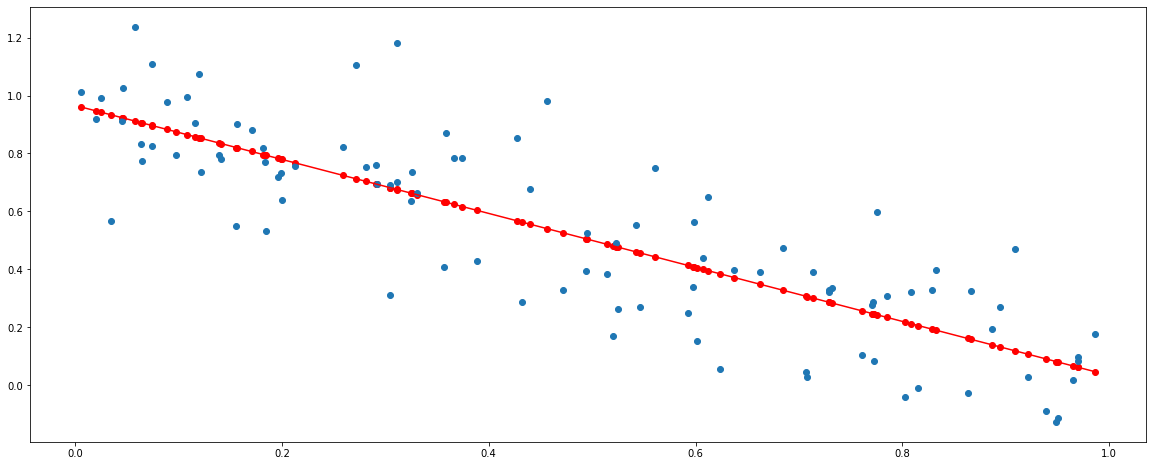

In [11]:
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.scatter(x, y_pred, color='red')
plt.scatter(x, y);

## Fit complex hand drawn data

* First knowledg: this is highly non linear

In [12]:
import numpy as np

# derived from here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
# something like this is also possible, but timeseries_dataset_from_array is a bit weird
# dataset = tf.keras.preprocessing.timeseries_dataset_from_array(data=data[:-n_steps], targets=data[n_steps:], sequence_length=n_steps)
# for batch in dataset:
#     inputs, targets = batch
#     print(inputs)
#     print(targets)
#     break

# split sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out=1):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 

In [13]:
 !pip install -q drawdata

In [14]:
from drawdata import draw_line, draw_scatter, draw_histogram

draw_line()

In [15]:
drawdata_data = """
x,y,z
41,126,a
45,129,a
49,131,a
51,135,a
56,140,a
58,145,a
62,157,a
66,164,a
68,167,a
70,171,a
70,173,a
72,175,a
73,179,a
74,181,a
77,185,a
79,188,a
83,192,a
86,194,a
90,199,a
91,200,a
94,202,a
95,204,a
97,206,a
98,207,a
100,209,a
105,215,a
109,219,a
113,223,a
119,228,a
121,230,a
123,232,a
127,236,a
129,237,a
132,239,a
136,242,a
140,243,a
142,245,a
147,246,a
149,247,a
151,247,a
157,247,a
161,247,a
166,247,a
171,247,a
172,247,a
174,247,a
176,247,a
177,246,a
179,243,a
180,242,a
182,241,a
182,238,a
182,236,a
183,234,a
183,232,a
183,231,a
183,230,a
184,227,a
184,222,a
185,221,a
185,220,a
187,218,a
187,215,a
187,213,a
187,211,a
188,210,a
189,209,a
190,206,a
191,204,a
191,203,a
193,201,a
195,200,a
196,197,a
197,196,a
198,194,a
198,193,a
200,190,a
201,187,a
203,185,a
206,180,a
209,176,a
210,173,a
215,164,a
218,159,a
220,157,a
223,152,a
224,148,a
225,146,a
227,141,a
230,139,a
231,137,a
232,134,a
233,133,a
234,131,a
236,127,a
237,126,a
237,122,a
239,120,a
241,117,a
242,113,a
245,108,a
248,107,a
251,105,a
255,103,a
258,103,a
259,103,a
260,103,a
264,103,a
267,103,a
269,104,a
274,104,a
278,106,a
282,108,a
286,109,a
290,111,a
293,113,a
296,114,a
298,116,a
300,117,a
304,120,a
306,122,a
311,125,a
316,128,a
322,131,a
325,132,a
332,137,a
335,141,a
341,148,a
349,162,a
355,170,a
358,179,a
360,194,a
362,203,a
363,210,a
363,217,a
363,220,a
365,225,a
366,233,a
369,238,a
370,244,a
373,252,a
374,257,a
377,259,a
379,263,a
380,266,a
381,269,a
383,271,a
386,277,a
388,281,a
391,288,a
397,303,a
401,318,a
402,326,a
402,330,a
402,331,a
402,333,a
403,336,a
404,336,a
405,336,a
405,337,a
407,336,a
407,334,a
409,328,a
410,324,a
410,322,a
410,320,a
410,319,a
412,316,a
413,314,a
414,312,a
416,307,a
419,303,a
421,300,a
422,298,a
426,293,a
429,287,a
431,282,a
436,272,a
437,267,a
440,261,a
442,255,a
445,250,a
448,244,a
454,236,a
456,232,a
459,225,a
462,219,a
463,212,a
466,205,a
469,193,a
470,186,a
473,179,a
476,170,a
479,162,a
482,152,a
486,140,a
488,133,a
488,128,a
488,126,a
488,125,a
488,124,a
488,122,a
488,126,a
488,129,a
488,131,a
489,135,a
490,142,a
493,155,a
498,166,a
503,181,a
507,202,a
509,209,a
512,215,a
514,222,a
517,228,a
523,235,a
526,242,a
532,252,a
533,258,a
534,260,a
536,262,a
536,264,a
536,266,a
536,265,a
536,264,a
537,263,a
537,260,a
537,258,a
537,257,a
537,256,a
542,248,a
544,239,a
549,228,a
553,215,a
556,208,a
556,206,a
556,201,a
556,200,a
556,199,a
559,191,a
560,186,a
562,179,a
562,175,a
562,174,a
562,172,a
562,171,a
563,171,a
564,171,a
565,171,a
566,171,a
568,171,a
570,171,a
571,173,a
575,175,a
581,178,a
583,179,a
588,180,a
593,182,a
595,185,a
599,186,a
605,189,a
609,192,a
612,194,a
618,197,a
621,199,a
624,202,a
627,204,a
629,206,a
630,207,a
634,210,a
636,211,a
639,213,a
642,216,a
646,218,a
648,219,a
652,221,a
654,223,a
657,225,a
658,226,a
660,227,a
662,229,a
665,231,a
667,232,a
668,233,a
670,233,a
672,234,a
674,235,a
676,238,a
677,238,a
678,240,a
681,241,a
683,242,a
685,244,a
687,246,a
689,247,a
690,248,a
692,250,a
694,251,a
694,252,a
695,252,a
"""

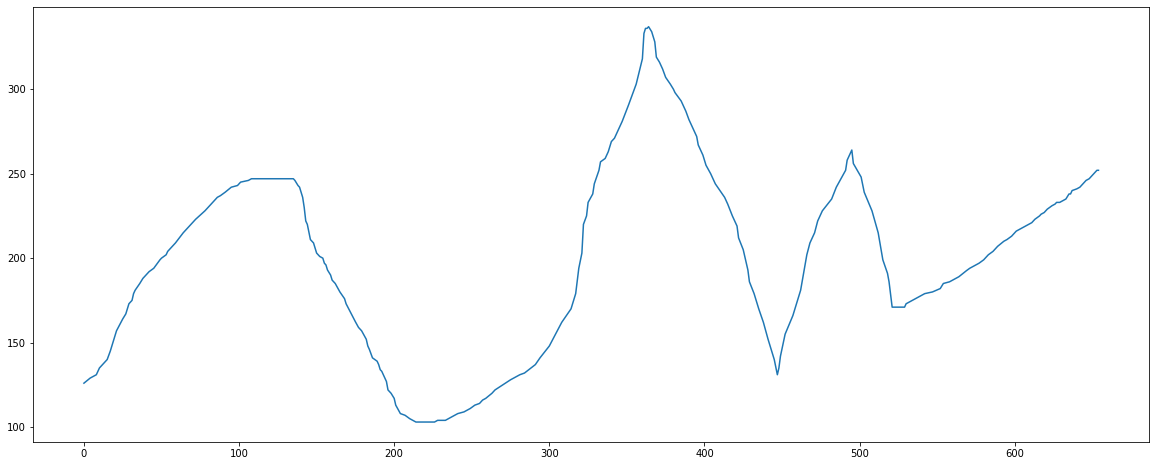

In [16]:
from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO(drawdata_data))
df['x'] = df['x'] - df['x'].min()
df['timestamp'] = pd.to_datetime(df['x'], unit='s')
df = df.drop_duplicates(subset='timestamp', keep='last')
df = df.set_index('timestamp', drop=True)
df.drop(['x', 'z'], axis=1, inplace=True)
df = df.resample('S').interpolate()
data = df['y'].to_numpy()
plt.plot(data);

In [36]:
from tensorflow.keras.layers import Dense, Input
 
model = tf.keras.Sequential([
  Input(shape=1),
  Dense(units=1500, activation='relu'),                   
  Dense(units=1500, activation='relu'),                   
  Dense(units=1500, activation='relu'),                   
  Dense(units=1)                   
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1500)              3000      
                                                                 
 dense_6 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_7 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_8 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 4,507,501
Trainable params: 4,507,501
Non-trainable params: 0
_________________________________________________________________


In [37]:
df = pd.read_csv(StringIO(drawdata_data))
df['x'] = df['x'] - df['x'].min()
df.drop(['z'], axis=1, inplace=True)
x = df['x']
y = df['y']

In [38]:
x = df['x']
y = df['y']

In [39]:
# we do a special test / train split, 
split_point = round(x.shape[0] * 0.5)

x_train = x[:-split_point]
y_train = y[:-split_point]

x_test = x[-split_point:]
y_test = y[-split_point:]

x_train.shape, x_train.shape, x_test.shape, y_test.shape

((150,), (150,), (150,), (150,))

In [40]:
%%time 

# Olli: slower 
# learning_rate=0.0005
# defaiult
learning_rate=0.001
# Mikio: faster
# learning_rate=0.01

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='mse',
             optimizer=optimizer,
             metrics=[r2_metric])

history = model.fit(x_train, y_train, epochs=3000, verbose=0, shuffle=True)

CPU times: user 46.2 s, sys: 3.69 s, total: 49.9 s
Wall time: 41.4 s


In [41]:
loss, r2 = model.evaluate(x, y, verbose=0)
loss, r2

(48657.09375, -1046.107666015625)

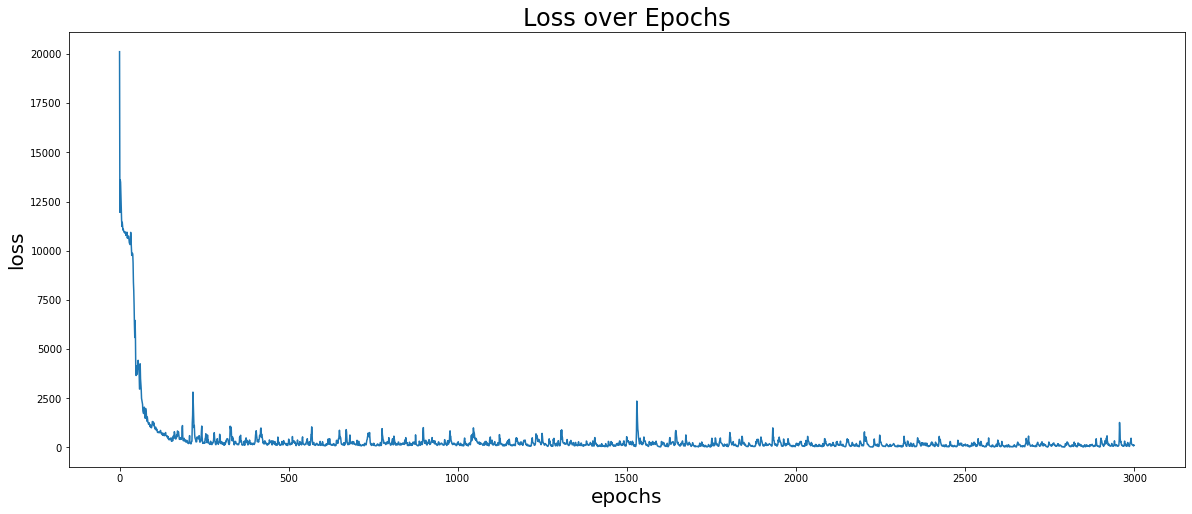

In [42]:
# plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title('Loss over Epochs')

plt.plot(history.history['loss']);

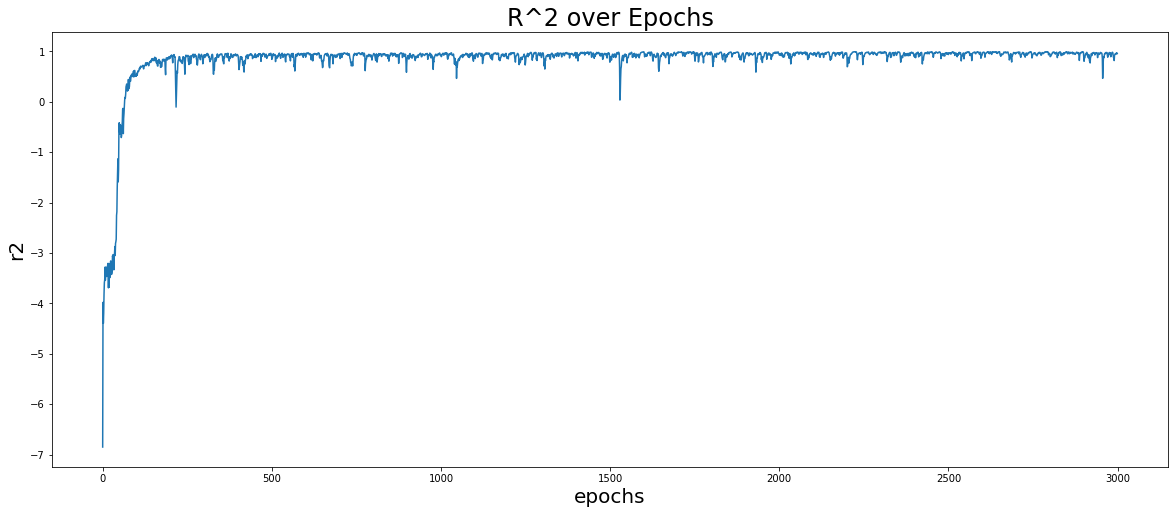

In [43]:
plt.ylabel("r2")
plt.xlabel("epochs")
plt.title('R^2 over Epochs')
# plt.yscale('log')

plt.plot(history.history['r2_metric']);

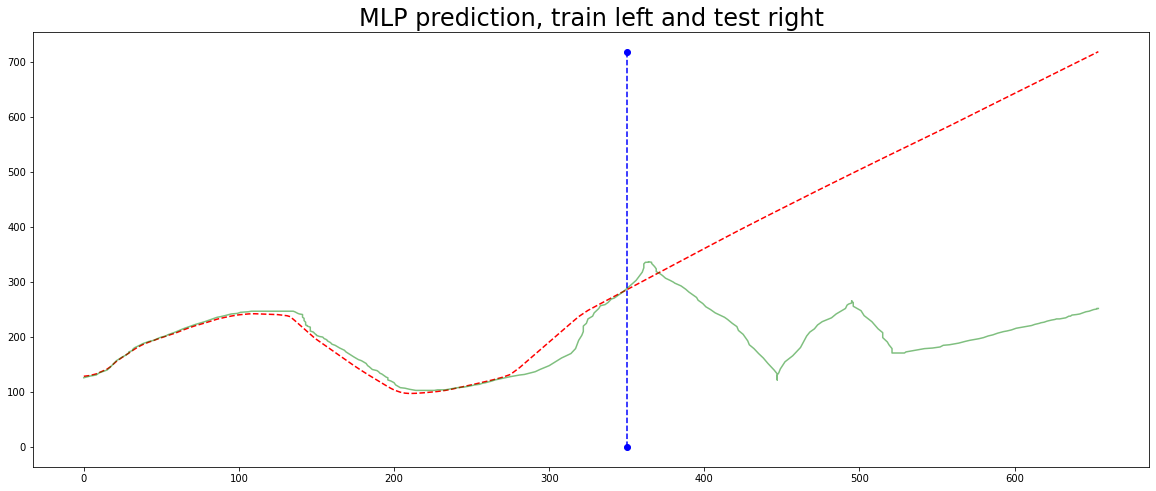

In [44]:
y_pred = model.predict(x)

plt.plot(x, y_pred, color='red', ls='dashed')
# plt.scatter(x, y_pred, color='red')
plt.plot((x_train.max(), x_train.max()), (0, y_pred.max()),  color='b', marker='o', linestyle='dashed');

# plt.scatter(x, y);
plt.plot(x, y, alpha=0.5, color='g')
plt.title('MLP prediction, train left and test right');

## Using more world knowledge

This is a sequence, each point is a continuation of the previous ones 

In [26]:
df = pd.read_csv(StringIO(drawdata_data))
df['x'] = df['x'] - df['x'].min()
df['timestamp'] = pd.to_datetime(df['x'], unit='s')
df = df.drop_duplicates(subset='timestamp', keep='last')
df = df.set_index('timestamp', drop=True)
df.drop(['x', 'z'], axis=1, inplace=True)
df = df.resample('S').interpolate()
data = df['y'].to_numpy()

In [27]:
#@title Prediction from n past steps { run: "auto", display-mode: "both" }

# https://colab.research.google.com/notebooks/forms.ipynb

n_steps_in = 30 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 1

X, Y = split_sequence(data, n_steps_in, n_steps_out)
X.shape, Y.shape

((625, 30), (625, 1))

In [28]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(625, 30, 1)

In [29]:
# we do a special test / train split, 
split_point = round(X.shape[0] * 0.5)

X_train = X[:-split_point]
Y_train = Y[:-split_point]

X_test = X[-split_point:]
Y_test = Y[-split_point:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((313, 30, 1), (313, 1), (312, 30, 1), (312, 1))

In [30]:
%%time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.models import Sequential, Model

model = Sequential()
# model.add(SimpleRNN(units=1, activation='linear', input_shape=(n_steps_in, n_features), name="RNN_Input"))
# model.add(GRU(units=1, activation='linear', input_shape=(n_steps_in, n_features), name="RNN_Input"))
# model.add(LSTM(units=1, activation='linear', input_shape=(n_steps_in, n_features), name="RNN_Input"))
model.add(SimpleRNN(units=50, activation='relu', input_shape=(n_steps_in, n_features), name="RNN_Input"))
# model.add(GRU(units=50, activation='relu', input_shape=(n_steps_in, n_features), name="RNN_Input"))
model.add(Dense(units=1, name="Linear_Output"))
model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

batch_size = 32
epochs=50

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    # callbacks=[KerasLearningCurve()], 
                    verbose=0)

CPU times: user 23.6 s, sys: 1.94 s, total: 25.5 s
Wall time: 27.4 s


In [31]:
loss, r2 = model.evaluate(X, Y, batch_size=len(X), verbose=0)
r2

0.993255615234375

In [32]:
loss, r2 = model.evaluate(X_train, Y_train, batch_size=len(X_train), verbose=0)
r2

0.9953175187110901

In [33]:
loss, r2 = model.evaluate(X_test, Y_test, batch_size=len(X_test), verbose=0)
r2

0.9869193434715271

In [34]:
Y_pred = model.predict(X)
Y_pred.shape

(625, 1)

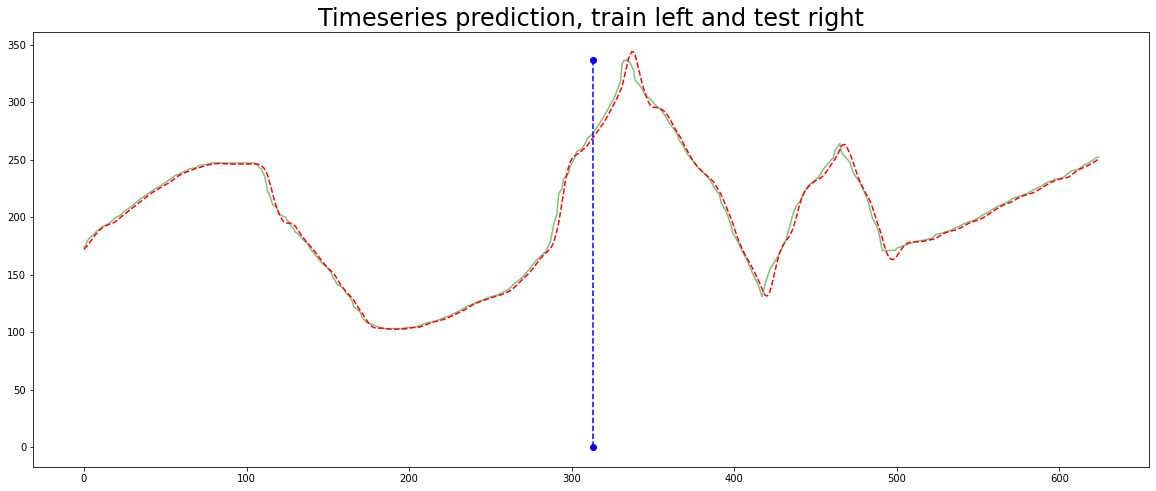

In [35]:
# this gets really crowded, using a stride, makes it more readable
stride = 1

# for the first n days we have no prediction, so get rid of them
plt.plot(data[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride], color='r', ls='dashed')
plt.plot((X_train.shape[0] / stride, X_train.shape[0] / stride), (0, data.max()),  color='b', marker='o', linestyle='dashed');

plt.title('Timeseries prediction, train left and test right');